In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Para realizar la convolucion de dos señales discretas hay 2 metodos.

## El Metodo de Ecos:
  
1) Construir todas las funciones $h[n-k]$ desplazadas para todo k.

2) Multipliacar las funciones desplazadas $h[n-k]$ por su peso $x[k]$ correspondiente.

3) Sumar todas las funciones $x[k]h[n-k]$ resultantes.

Como se trata de un proceso de sumatoria es posible recurrir a array acumalativo para iteracion k de modo que no se deben calcular todas las funciones $h[n-k]$ desplazadas a la vez. En su lugar cada iteracion k estima la el "eco" o "pieza" $x[k]h[n-k]$ y luego la va colancando sobre la mesa.

En este sentido el proceso no es diferente a armar un rompecabezas.

## El metodo de desplazamiento:

1) Conciderar $h[k]$ y $x[k]$ como funciones de k. $h[n-k]$ es la funcion reflejada y desplazada de $h[k]$.

2) Mientras $x[k]$ se mantiene en reposo, $h[n-k]$ se "desplaza" haci ella a medida que n cambia.

3) Para cada n se resuelve el producto $x[k]h[n-k]$ para todo k. El resultado es la magnitud de $y[n]$ en para un valor de n es particular.

4) Se suman todos los valores individulaes de $y[n]$

El igual que en el metodo de los ecos se puede ir recuriendo a un array acumulativo para ir contruyendo $y[n]$ poco a poco, solo que ahora se estan contruyendo a muestras y no a traves de señales.






# Funciones


In [ ]:
#-----------------------Funcion de Traformacion Metodo Desplazar/Escalar---------------------------------------------------

def Trasform_DesEsc(n,x_n,Valor_esc,Valor_des,Inter_P=1,Grafic=True):

    #-------------------------------------------Librerias---------------------------------------------------#

    import numpy as np
    import matplotlib.pyplot as plt

    #------------------------------------------Funcion encargada de la graficación---------------------------#

    def Graf_DesEsc(n,x_n,n_des,n_esc,n_escI,x_nesc,Valor_des,Valor_esc,inv,Inter_P):

        def limites():

            x_min=np.min(x_n)                                                           # Ya que la funcion np.max y np.min no son buenas comparando numeros enteros. Se debe extraer primero
            x_max=np.max(x_n)                                                           # Todos los minimos y maximos.
            n_min=np.min(n)
            n_max=np.max(n)
            n_des_min=np.min(n_des)
            n_des_max=np.max(n_des)
            n_esc_min=np.min(n_esc)
            n_esc_max=np.max(n_esc)
            n_escI_min=np.min(n_escI)
            n_escI_max=np.max(n_escI)

            y_min=min(n_min,n_des_min,n_esc_min,n_escI_min)                             # Todos limites derechos y izquierdos se comparan y se conservan los de mayor magnitud.
            y_max=max(n_max,n_des_max,n_esc_max,n_escI_max)

            plt.axis([y_min-2,y_max+2,x_min-2,x_max+2])

        if (Valor_des<0):
            sig_lable='-'
        else:
            sig_lable='+'

        if (np.abs(Valor_esc)>1):
            tipo_lable=' '
        else:
            if (Inter_P==1):
                    tipo_lable='(Interpolacion Cero)'
            elif (Inter_P==2):
                    tipo_lable='(Interpolacion Escalón)'
            elif (Inter_P==3):
                    tipo_lable='(Interpolacion Lineal)'

        #-----------------------------------Dimenciones de la Graficas----------------------------------------

        if (inv==False):
            plt.figure(figsize=(15,5))
        else:
            plt.figure(figsize=(15,12))

        if (inv==False):
            plt.subplot(1,3,1)
        else:
            plt.subplot(2,2,1)

        #---------------------------------------Grafica señal Original-------------------------------------

        plt.stem(n,x_n,basefmt=" ", label=f'$x[n]$')
        plt.title("Señal Discreta")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limites()
        plt.grid(True)
        plt.legend()

        #---------------------------------------Grafica señal Desplazada-------------------------------------

        if (inv==False):
            plt.subplot(1,3,2)
        else:
            plt.subplot(2,2,2)

        plt.stem(n_des,x_n,linefmt='r', basefmt=" ", label=f'$x[n{sig_lable}{np.abs(Valor_des)}]$')
        plt.title("Señal Discreta Desplazada")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limites()
        plt.grid(True)
        plt.legend()

        #---------------------------------------Grafica señal Escalada-------------------------------------

        if (inv==False):
            plt.subplot(1,3,3)
        else:
            plt.subplot(2,2,3)

        plt.stem(n_esc,x_nesc,linefmt='g', basefmt=" ", label=f'$x[{np.abs(Valor_esc)}n{sig_lable}{np.abs(Valor_des)}]$')
        plt.title(f'Señal Discreta Escalada {tipo_lable}')
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limites()
        plt.grid(True)
        plt.legend()

        #---------------------------------------Grafica señal Reflejada-------------------------------------

        if (inv==True):

            plt.subplot(2,2,4)
            plt.stem(n_escI,x_nesc,linefmt='g', basefmt=" ", label=f'$x[{Valor_esc}n{sig_lable}{np.abs(Valor_des)}]$')
            plt.title("Señal Discreta Reflejada")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limites()
            plt.grid(True)
            plt.legend()

        plt.show()

    #------------------------------------------Funcion encargada de la interpolacion Lineal------------------#

    def interpolacion_lineal(n1, x_n1, n2, x_n2, n):

        # Fórmula de interpolación lineal
        sol = x_n1 + (x_n2 - x_n1) * (n - n1) / (n2 - n1)
        return sol

    #--------------------------------------------Desplazamiento-----------------------------------------------#

    n_des=n-(Valor_des)                                                                  # Restar el valor del desplazamiento basta para obtener el vecto n desplazado
                                                                                         # Si n0>0 se presenta un adelanto. Si n0<0 se presenta un atraso.

    #----------------------------------------------Escalado---------------------------------------------------#

    if (np.abs(Valor_esc)>1):

        n_esc = np.array([x // (np.abs(Valor_esc)) for x in n_des if x % np.abs(Valor_esc) == 0])        # Se crea el vector de n escalado. Se aplica la division entera del valor abs de a
                                                                                                        # factor de escalado para cada dato de el vector de n desplazado, pero solo se guardan
                                                                                                        # los resultados enteros.

        x_nesc = np.array([x_n[np.digitize(np.abs(Valor_esc)*i, n_des) - 1] for i in n_esc])    # Se arma el vector de amplitudes diezmado. Primero se toma cada valor de n escalado y se regresa
                                                                                                # a su valor original. Luego se busca el indice de ese valor en el vector n sin escalar
                                                                                                # Para esto se usa la funcion digitize (). Como las dimeciones de n y X[n] son las misma,
                                                                                                # basta con este indice para extraer el valor de x[n] correspondiente.

    else:

        Z=int(1/np.abs(Valor_esc))                                                       # El factor que se multiplica cada valor de tiempo es 1/M.
        n_esc=np.arange(np.min(n_des)*Z,np.max(n_des)*Z+1)                               # Se escala el vector n desplazado.
        L_ndes=len(n_des)                                                                # Longitud del vector n desplazado.
        L_nesc=len(n_esc)                                                                # Longitud del vector n escalado.

        x_nesc = np.arange(1,L_nesc+1,dtype=float)                                       # Se crea un vector para las amplitudes de la señal escalada.

        for k in range(L_nesc):                                                          # Se analiza los indeces del vector n escalado.

            if (k / Z).is_integer():

                r=int(k*np.abs(Valor_esc))
                x_nesc[k]=x_n[r]

            else:

                if (Inter_P==1):                                                         # Define el metodo de interpolacion  (Inter_P=1 [Por defecto]-->Interpolacion con 0)
                    x_nesc[k]=0                                                           #                                    (Inter_P=2--> Interpolacion Escalon)
                elif (Inter_P==2):                                                       #                                    (Inter_P=3--> Interpolacion Lineal)
                    x_nesc[k]=x_nesc[k-1]
                elif (Inter_P==3):
                    x_nesc[k]=interpolacion_lineal(n_esc[r*Z], x_n[r], n_esc[(r+1)*Z], x_n[r+1], n_esc[k]) # Formula de interpolación

    #----------------------------------------------Invercion---------------------------------------------------#

    if (Valor_esc<0):                                                            # Si el señal debe reflejarse se invierte la direccion del vector n escalado.
        n_escI=-n_esc
        Key_inv=True

        n_esc_retur=np.flip(n_escI)                                              # np.flip invierte el orden de los datos de n_esc y x_nesc.
        x_nesc_retur=np.flip(x_nesc)

    else:
        n_escI=n_esc
        Key_inv=False

        n_esc_retur=n_esc
        x_nesc_retur=x_nesc

  #----------------------------------------------Salida-----------------------------------------------------#

    if (Grafic==True):

        Graf_DesEsc(n,x_n,n_des,n_esc,n_escI,x_nesc,Valor_des,Valor_esc,Key_inv,Inter_P)   # En el caso de que se desse graficar el parametro Grafic=True [Por defecto] y la funcion graficara la trasformacion.

    else:

        return n_esc_retur, x_nesc_retur                                                   # En el caso de que desee obtener los valores de la señal trasformada el parametro Grafic=False y la
                                                                                           # Funcion entregara una tubla con los valores de n escala y x[n] escala.

#-----------------------Funcion para poner señales sobre el mismo eje -----------------------------------------------------

def Uni_Sig(n1,x1,n2,x2,n_eje=None):

    Min_n1=np.min(n1)
    Max_n1=np.max(n1)

    Min_n2=np.min(n2)
    Max_n2=np.max(n2)

    if n_eje is None:
        n_uni=np.arange(min(Min_n1,Min_n2),max(Max_n1,Max_n2)+1)                 # El vector comun n donde se realizara la operacion. Si la longitud de las partes es el mismo
                                                                                 # resultara en el mismo n.
    else:
        n_uni=n_eje


    x1_uni=np.zeros(len(n_uni),dtype=float)                                  # Se crean los vectores para contener la amplitud de las señales a operar. Rellenar con cero
    x2_uni=np.zeros(len(n_uni),dtype=float)                                  # incialmente es convenienete. Proximamamente se adicionaran las amplitudes de x1 y x2

    x1_uni[np.isin(n_uni, n1)] = x1                                          # La función np.isin comprueba la presencia de elementos de n1 (o n2) en np.op y genera un array
                                                                                 # booleano de la misma longitud de n.op que indica si cada elemento n1 se encuentra en n.op.
                                                                                 # --->[True, False, False, True,.....]
                                                                                 # Esta instruccion asigna todos los elementos de x1 a x1_op. En orden los valores de x1
                                                                                 # tendran las mismas pocisiones que el array booleano marca como True. Las pocisiones False
                                                                                 # mantendran el cero inicial.
    x2_uni[np.isin(n_uni, n2)] = x2

    return n_uni,x1_uni,x2_uni

#--------------------------------------Funcion para Operar señales--------------------------------------------------------

def Operacion_Señales(n1,x1,n2,x2,Operacion=1,Grafic=True,Full=False):

    #-------------------------------------------Librerias---------------------------------------------------#

    import numpy as np
    import matplotlib.pyplot as plt

    #---------------------------------------Funcion para graficar tres señales-----------------------------------------------

    def Graf_3Sig_Op(n1,x1,n2,x2,n3,x3,Operacion=1):

        def limitesSig_Op():

            n1_min=np.min(n1)
            n1_max=np.max(n1)
            n2_min=np.min(n2)
            n2_max=np.max(n2)
            n3_min=np.min(n3)
            n3_max=np.max(n3)
            x1_min=np.min(x1)
            x1_max=np.max(x1)
            x2_min=np.min(x2)
            x2_max=np.max(x2)
            x3_min=np.min(x3)
            x3_max=np.max(x3)

            y_min=min(n1_min,n2_min,n3_min)
            y_max=max(n1_max,n2_max,n3_max)
            x_min=min(x1_min,x2_min,x3_min)
            x_max=max(x1_max,x2_max,x3_max)

            plt.axis([y_min-2,y_max+2,x_min-2,x_max+2])

        plt.figure(figsize=(15,12))

        plt.subplot(2,2,1)
        plt.stem(n1,x1,basefmt=" ", label=f'$x_{1}[n]$')
        plt.title(f"Señal Discreta $x_{1}[n]$")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limitesSig_Op()
        plt.grid(True)
        plt.legend()

        plt.subplot(2,2,2)
        plt.stem(n2,x2,linefmt='r',basefmt=" ", label=f'$x_{2}[n]$')
        plt.title(f"Señal Discreta $x_{2}[n]$")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limitesSig_Op()
        plt.grid(True)
        plt.legend()


        plt.subplot(2,2,3)
        plt.stem(n1,x1,linefmt="b", basefmt=" ", label=f'$x_{1}[n]$')

        if (Operacion==1):
            plt.stem(n2,x2,linefmt="r",basefmt=" ", label=f'$x_{2}[n]$')
            plt.title(f"Señal Discreta $x_{1}[n]+x_{2}[n]$")
        elif(Operacion==2):
            plt.stem(n2,-x2,linefmt="r",basefmt=" ", label=f'$-x_{2}[n]$')
            plt.title(f"Señal Discreta $x_{1}[n]-x_{2}[n]$")
        elif(Operacion==3):
            plt.stem(n2,x2,linefmt="r",basefmt=" ", label=f'$x_{2}[n]$')
            plt.title(f"Señal Discreta $x_{1}[n]x_{2}[n]$")

        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limitesSig_Op()
        plt.grid(True)
        plt.legend()

        plt.subplot(2,2,4)
        plt.stem(n3,x3,linefmt='g',basefmt=" ", label=f'$x_{3}[n]$')
        plt.title(f"Señal Discreta $x_{3}[n]$")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        limitesSig_Op()
        plt.grid(True)
        plt.legend()
        plt.show()

    # Como muchas veces las dimenciones no concuerdan debemos redefinir la señal mas pequeña a la misma longitud de la mas grande.
    # No es escalar la señal, porque la posicion de los valores debe respetarse. En pocas palabras la señal no se "estira".

    def Uni_Sig(n1,x1,n2,x2,n_eje=None):

        Min_n1=np.min(n1)
        Max_n1=np.max(n1)

        Min_n2=np.min(n2)
        Max_n2=np.max(n2)

        if n_eje is None:
            n_uni=np.arange(min(Min_n1,Min_n2),max(Max_n1,Max_n2)+1)             # El vector comun n donde se realizara la operacion. Si la longitud de las partes es el mismo
                                                                                 # resultara en el mismo n.
        else:
            n_uni=n_eje


        x1_uni=np.zeros(len(n_uni),dtype=float)                                  # Se crean los vectores para contener la amplitud de las señales a operar. Rellenar con cero
        x2_uni=np.zeros(len(n_uni),dtype=float)                                  # incialmente es convenienete. Proximamamente se adicionaran las amplitudes de x1 y x2

        x1_uni[np.isin(n_uni, n1)] = x1                                          # La función np.isin comprueba la presencia de elementos de n1 (o n2) en np.op y genera un array
                                                                                 # booleano de la misma longitud de n.op que indica si cada elemento n1 se encuentra en n.op.
                                                                                 # --->[True, False, False, True,.....]
                                                                                 # Esta instruccion asigna todos los elementos de x1 a x1_op. En orden los valores de x1
                                                                                 # tendran las mismas pocisiones que el array booleano marca como True. Las pocisiones False
                                                                                 # mantendran el cero inicial.
        x2_uni[np.isin(n_uni, n2)] = x2

        return n_uni,x1_uni,x2_uni

    #-----------------------------------------Preparan las funciones-----------------------------------------------

    n_op,x1_op,x2_op=Uni_Sig(n1,x1,n2,x2)

    #---------------------------------------Operar----------------------------------------------------------------

    if (Operacion==1):                                                            # Si Operacion = True [Por defecto] se hara una suma. Si Operacion = False se hara una resta.
        x_op=x1_op+x2_op
    elif (Operacion==2):
        x_op=x1_op-x2_op
    elif (Operacion==3):
        x_op=x1_op*x2_op
    else:
        return print("Error: tipo de operacion")


    #----------------------------------------------Salida-----------------------------------------------------#

    if (Grafic==True):
        Graf_3Sig_Op(n1,x1,n2,x2,n_op,x_op,Operacion)                             # En el caso de que se desse graficar el parametro Grafic=True [Por defecto] y la funcion graficara la trasformacion.
    else:
        if (Full==True):
            return n_op,x_op,x1_op,x2_op
        else:
            return n_op,x_op


# Algoritmos de Convolución por Ecos y Desplazamiento



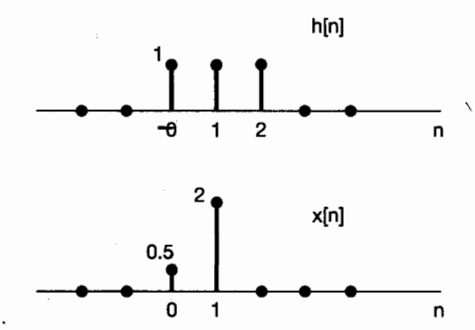

## Por Función Numpy

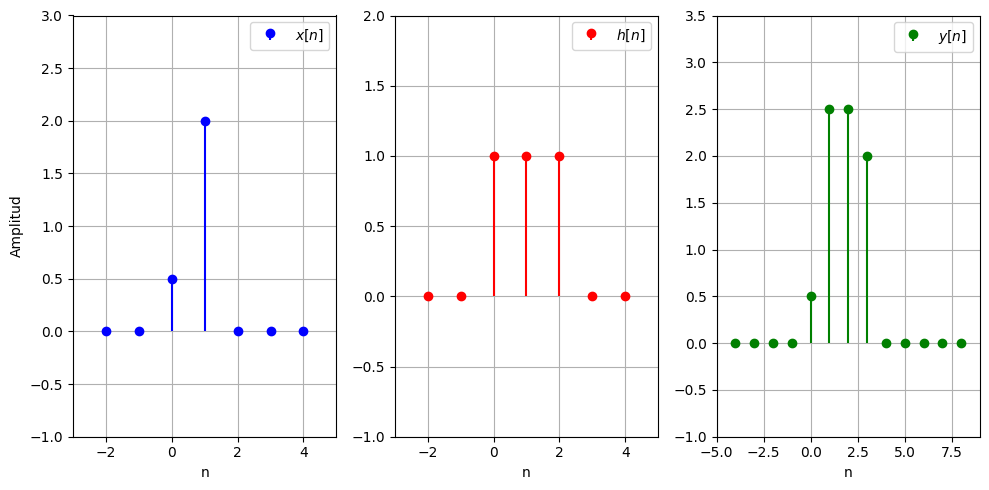

In [ ]:
# Construye x[n] y h[n]

n_x_inicio=-2
n_x_fin=4

n_h_inicio=-2
n_h_fin=4

n_x=np.arange(n_x_inicio,n_x_fin+1)
n_h=np.arange(n_h_inicio,n_h_fin+1)

x=[0,0,0.5,2,0,0,0]
h=[0,0,1,1,1,0,0]

L=len(x)+len(h)-1
n_y_inicio=n_h_inicio+n_x_inicio
n_y_fin=n_y_inicio+L-1

n_y=np.arange(n_y_inicio,n_y_fin+1)
y = np.convolve(x, h, mode='full')


fig, ax = plt.subplots(1, 3, figsize=(10,5))

ax[0].stem(n_x,x, basefmt=" ", label=f'$x[n]$', linefmt='b-')
ax[0].set_xlabel("n")
ax[0].set_ylabel("Amplitud")
ax[0].set_xlim(n_x_inicio-1,n_x_fin+1)
ax[0].set_ylim(np.min(x)-1,np.max(x)+1)

ax[1].stem(n_h,h, basefmt=" ", label=f'$h[n]$', linefmt='r-')
ax[1].set_xlabel("n")
ax[1].set_xlim(n_h_inicio-1,n_h_fin+1)
ax[1].set_ylim(np.min(h)-1,np.max(h)+1)

ax[2].stem(n_y,y, basefmt=" ", label=f'$y[n]$', linefmt='g-')
ax[2].set_xlabel("n")
ax[2].set_xlim(n_y_inicio-1,n_y_fin+1)
ax[2].set_ylim(np.min(y)-1,np.max(y)+1)

for i in range(0,3):
    ax[i].grid(True)
    ax[i].legend()

plt.tight_layout()
plt.show()

## Por Metodo de Ecos

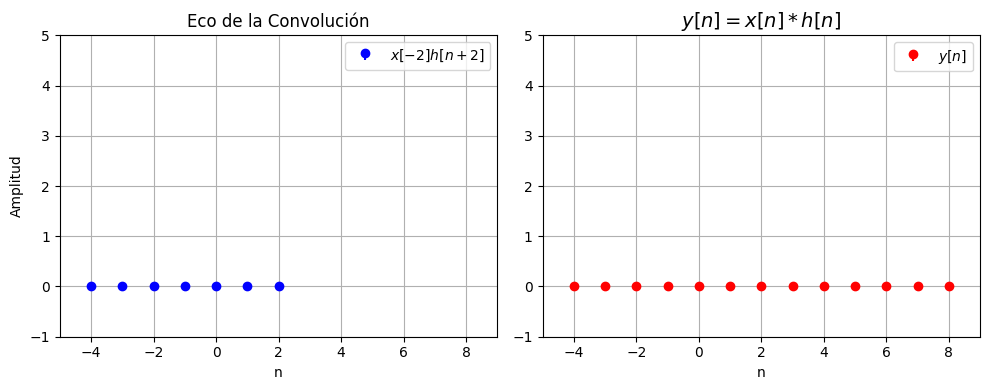

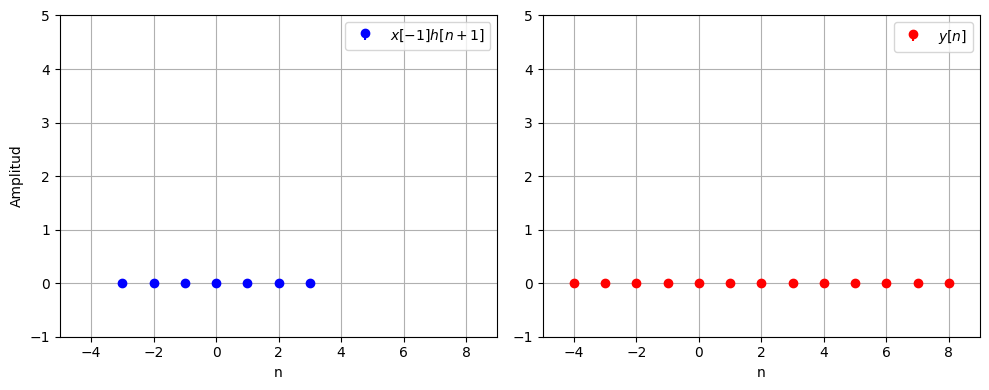

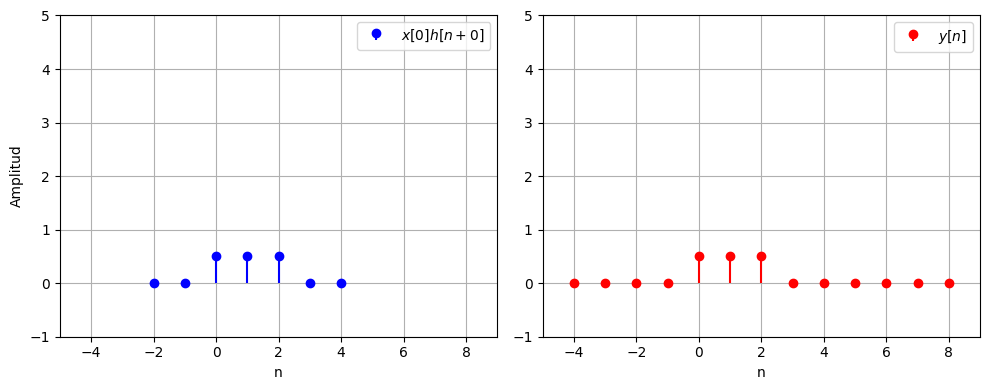

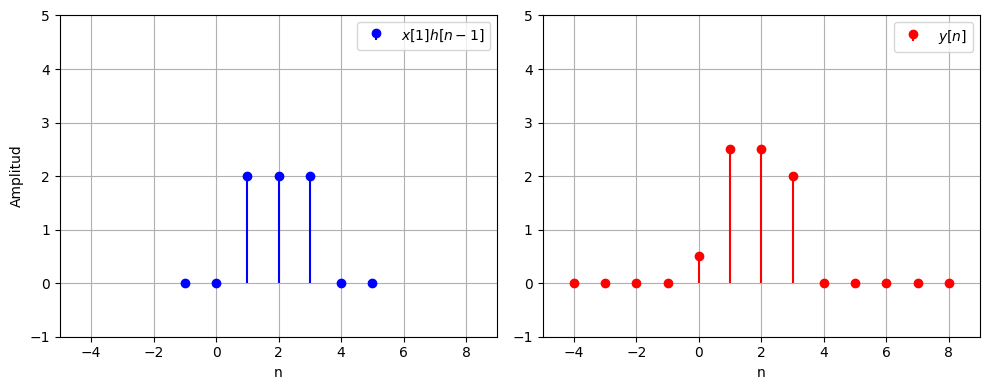

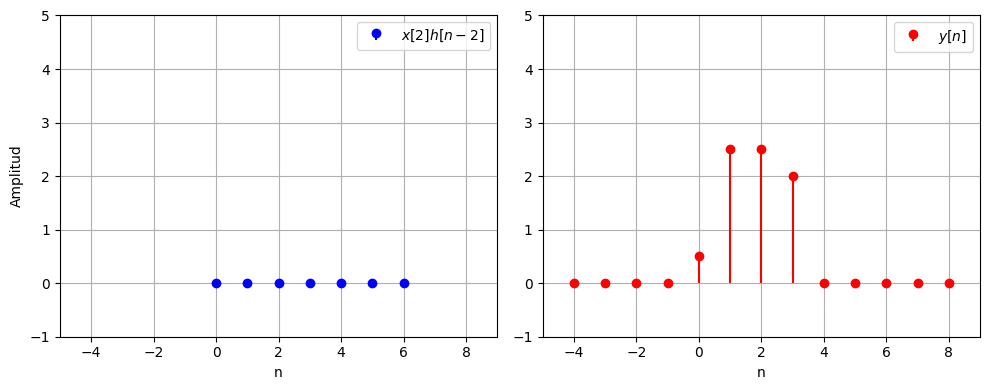

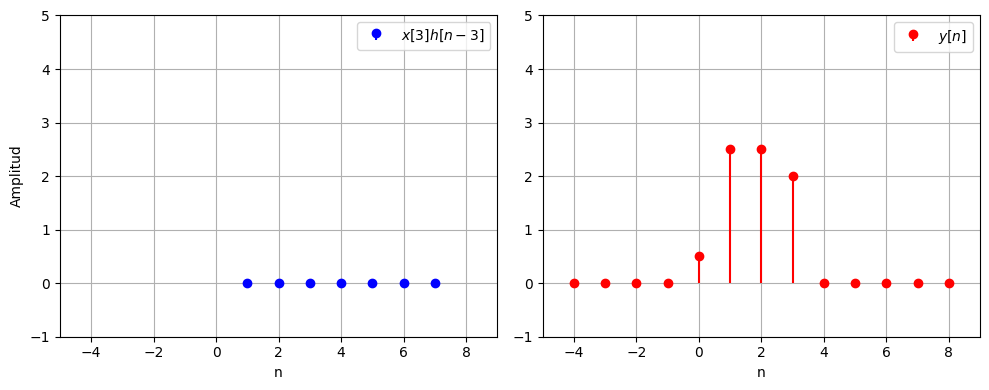

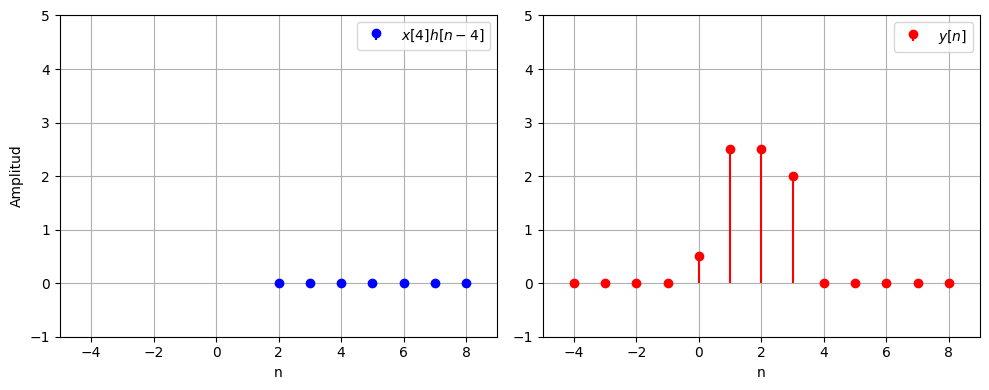

In [ ]:
#----------------Define las señales x[n] y h[n]--------------------------------

n_x_inicio=-2
n_x_fin=4

n_h_inicio=-2
n_h_fin=4

n_x=np.arange(n_x_inicio,n_x_fin+1)
n_h=np.arange(n_h_inicio,n_h_fin+1)

x=[0,0,0.5,2,0,0,0]
h=[0,0,1,1,1,0,0]

#--------------Parametros iiniciales de la señal y[n]---------------------------

L_conv=len(x)+len(h)-1                                                           # La longitud del eje n de y[n]
ini_n_conv=n_h_inicio+n_x_inicio                                                 # El punto n de inicio de la convolucion.
fin_n_conv=ini_n_conv+L_conv-1                                                   # El punto n de fin de la convolucion.

conv_max=2*np.max(x)*np.max(h)                                                   # En el peor de los casos la maxima amplitud sera el doble
                                                                                 # del producto de las maximas amplitudes de x y h.

conv_min=2*np.min(x)*np.min(h)                                                   # En el peor de los casos la minima amplitud sera el doble
                                                                                 # del producto de las minimas amplitudes de x y h.

space=max(abs(conv_max),abs(conv_min))*0.25                                      # Espaciado entre limites de la convolucion y la figura.

n_conv=np.arange(ini_n_conv,fin_n_conv+1)                                        # Eje n de y[n]

#----Construye el array acumulativo que adoptara la forma de y[n]---------------

y_conv=np.zeros (L_conv)

#---Calcula y suma iterativamente los ecos siguiendo los valores de n_x---------

for i in range(len(n_x)):

    n_des, h_des=Trasform_DesEsc(n_h,h,1,-n_x[i],Grafic=False)                   # Estima la señal deslazada h(n-k): Amplitud y eje n
    y_eco_k= x[i]*h_des                                                          # Estima el eco x(k)h(n-k)

    n_conv,y_conv=Operacion_Señales(n_conv,y_conv,n_des,y_eco_k,Operacion=1,
                                    Grafic=False)                                # Suma el eco a y[n]

    if (n_x[i]>0):
        sig_lable='-'
    else:
        sig_lable='+'

    #---------------------------------Traza Graficas----------------------------

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    if (i==0):
        ax[0].set_title(f'Eco de la Convolución')
        ax[1].set_title(r'$y[n]=x[n] * h[n]$',fontsize=14)


    ax[0].stem(n_des,y_eco_k, basefmt=" ", label=f'$x[{n_x[i]}]h[n{sig_lable}{abs(n_x[i])}]$'
            , linefmt='b-')

    ax[0].set_xlabel("n")
    ax[0].set_ylabel("Amplitud")
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_xlim(ini_n_conv-1,fin_n_conv+1)
    ax[0].set_ylim(conv_min-space,conv_max+space)

    ax[1].stem(n_conv,y_conv, basefmt=" ", label=f'$y[n]$', linefmt='r-')
    ax[1].set_xlabel("n")
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_xlim(ini_n_conv-1,fin_n_conv+1)
    ax[1].set_ylim(conv_min-space,conv_max+space)

    plt.tight_layout()
    plt.show()


## Por Metodo de Desplazamiento

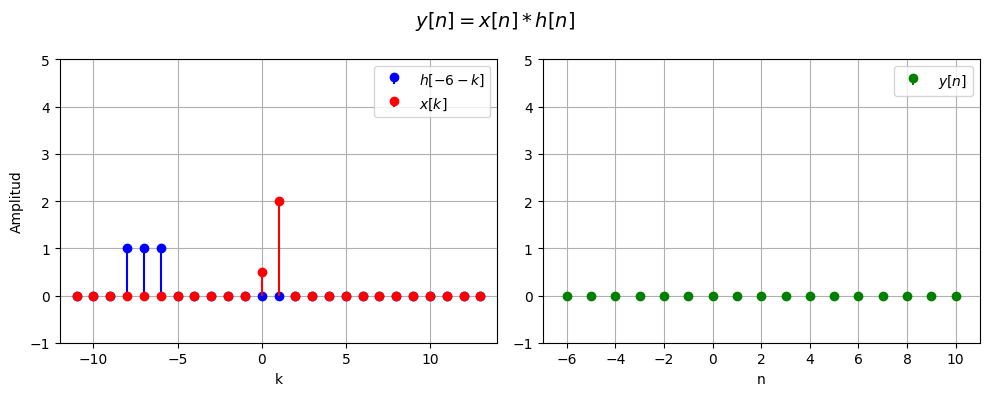

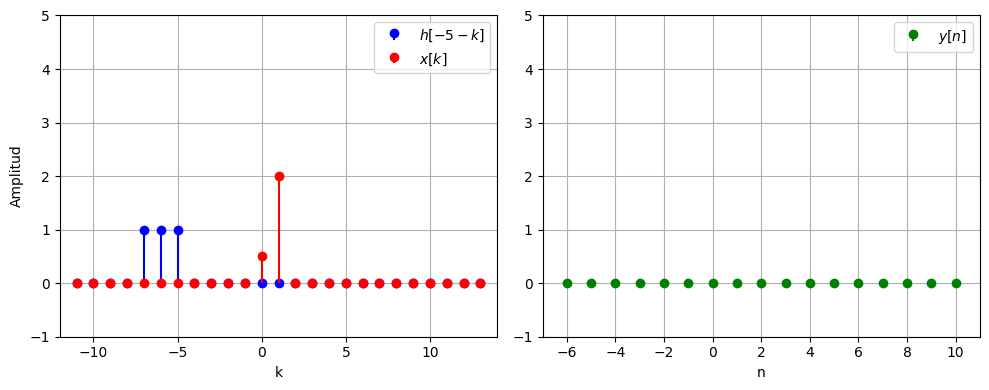

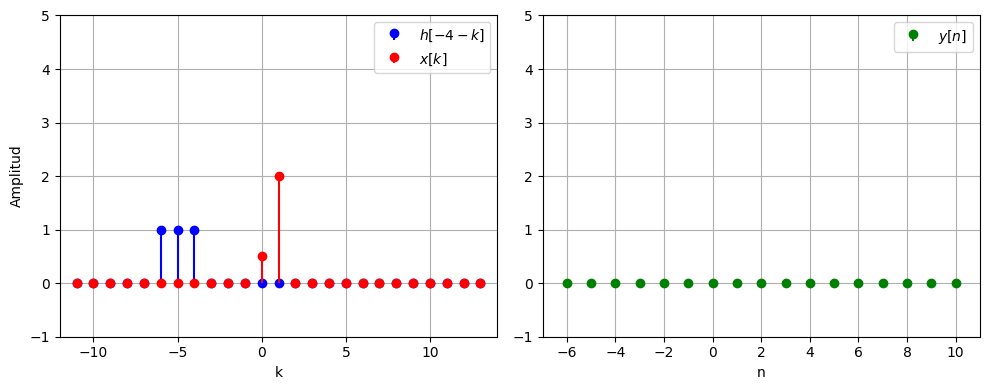

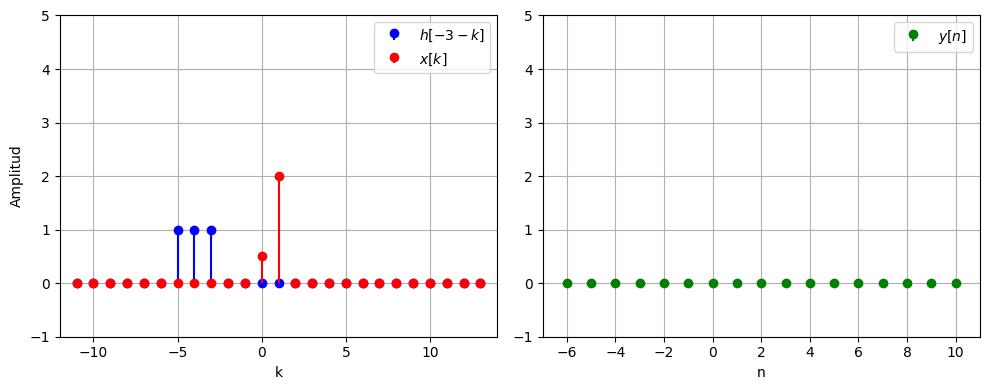

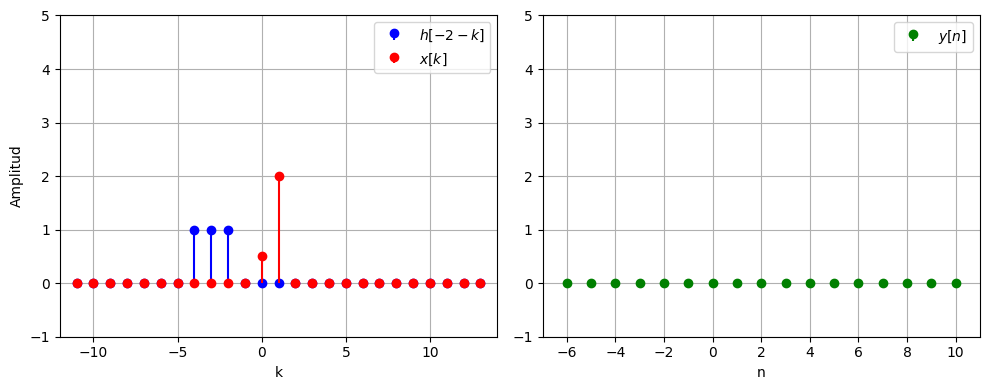

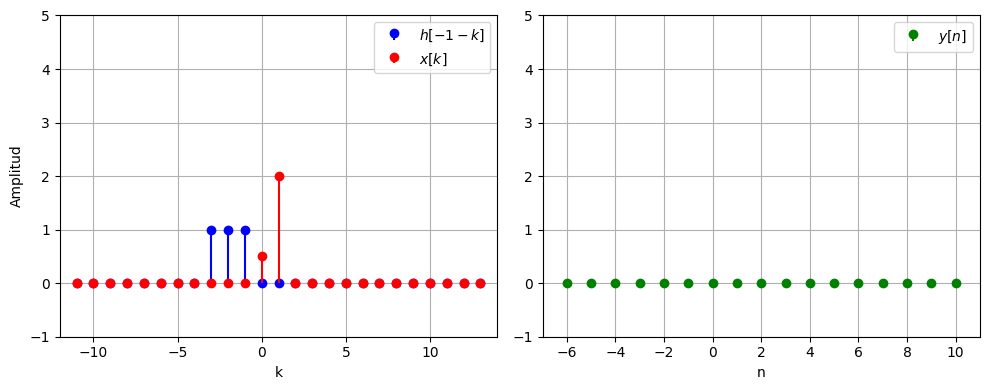

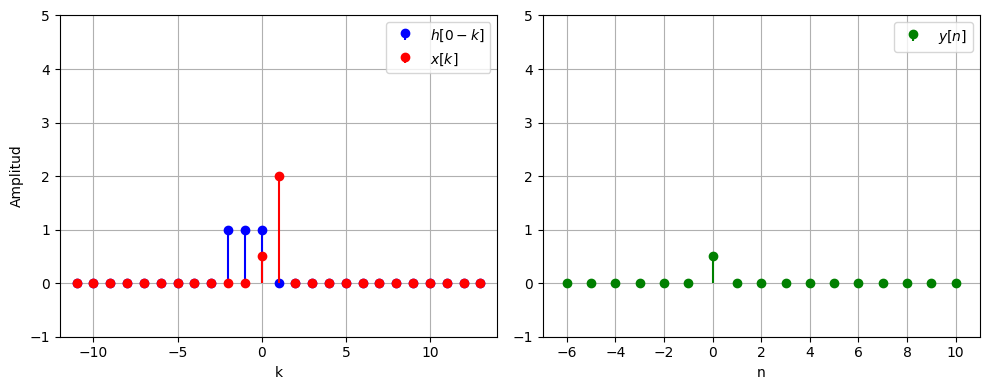

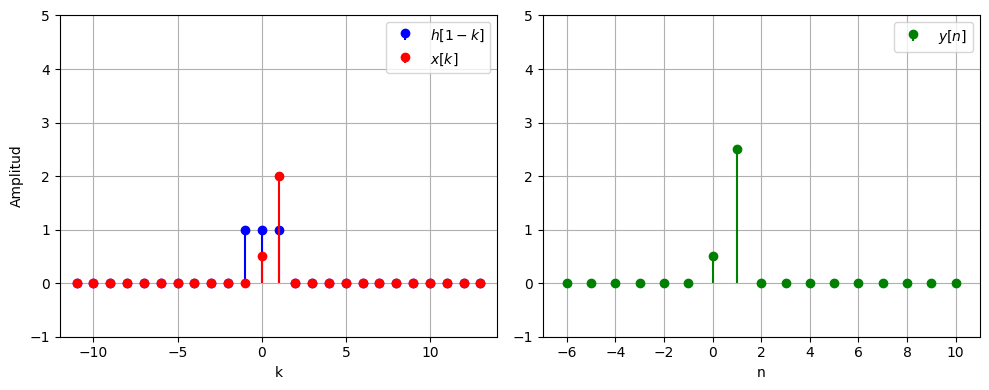

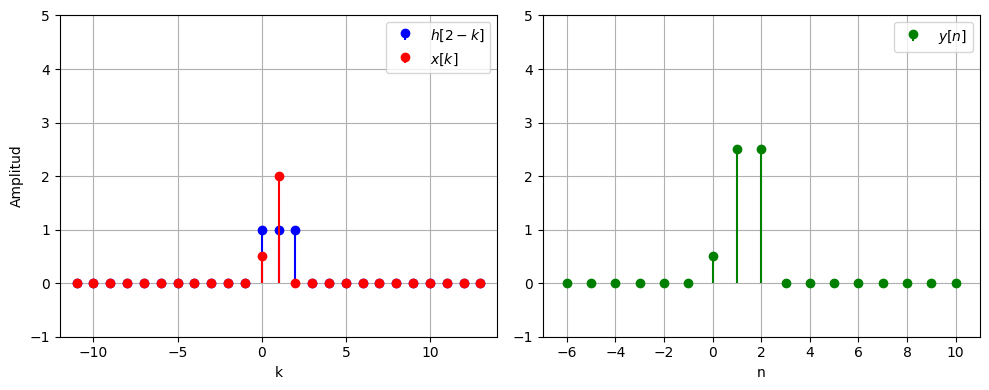

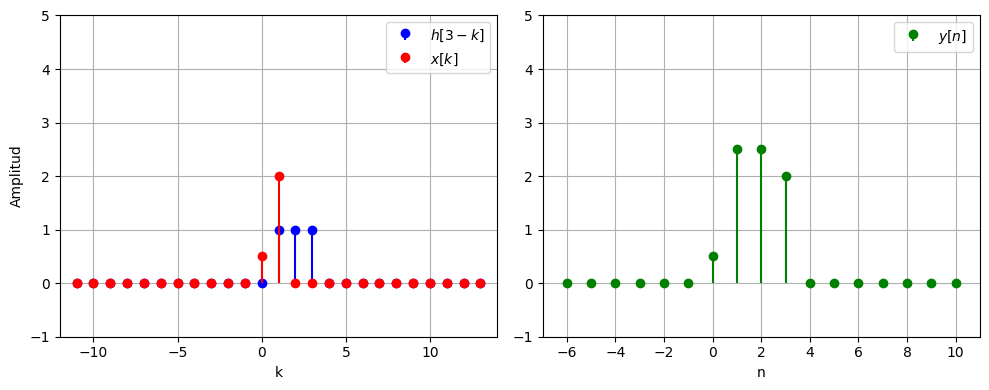

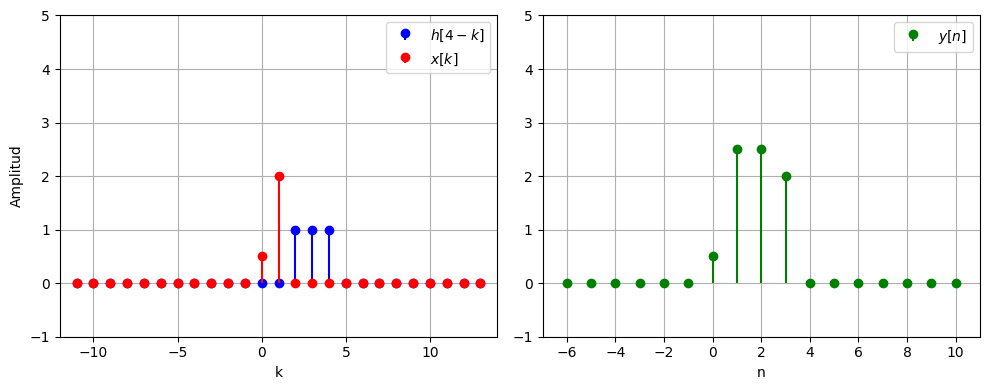

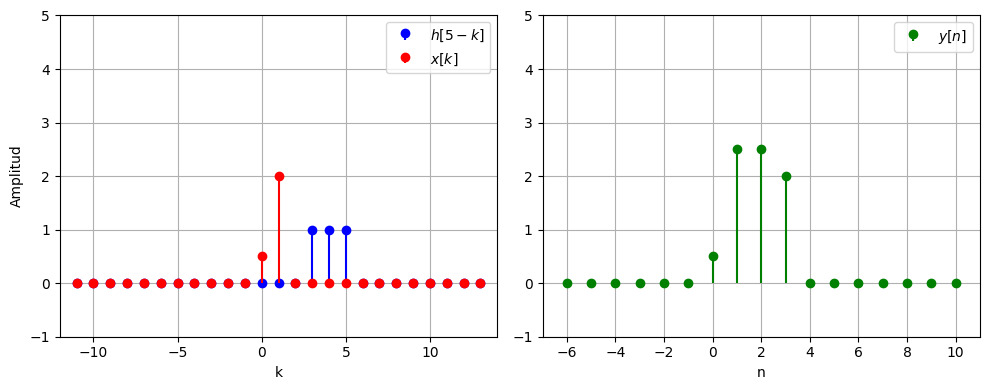

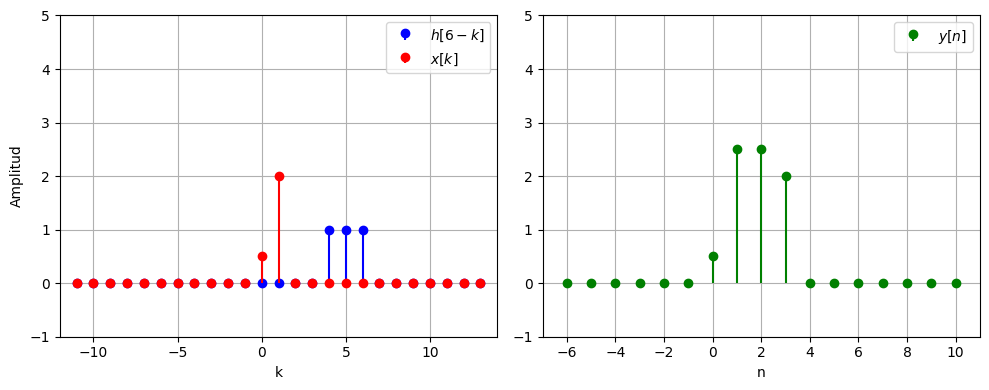

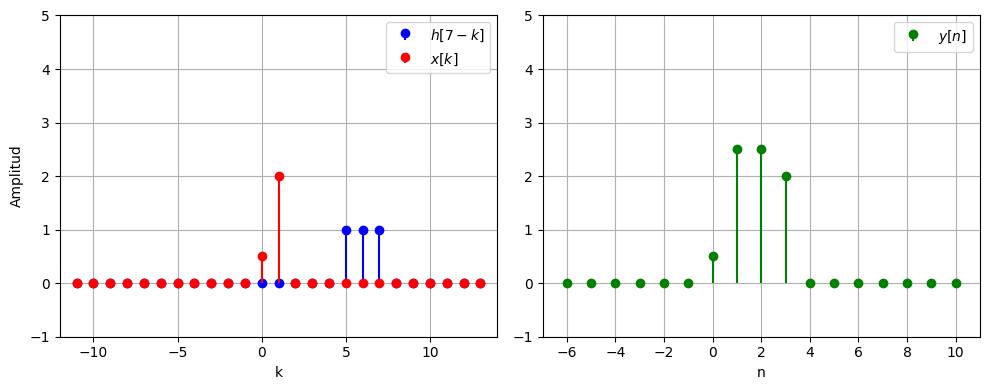

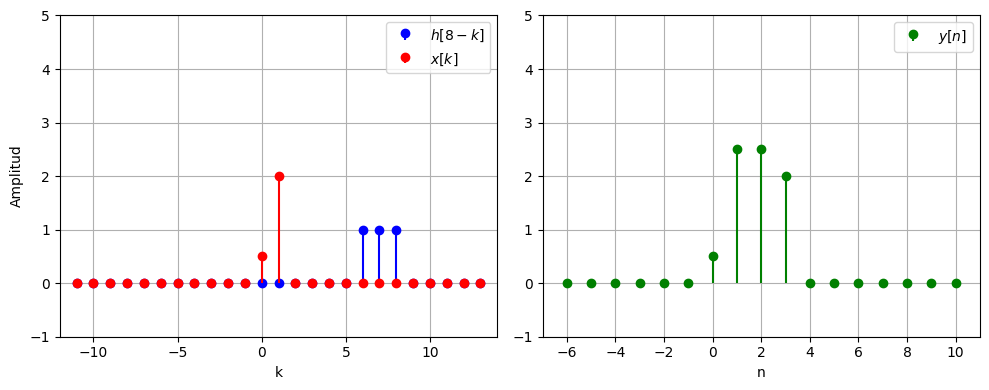

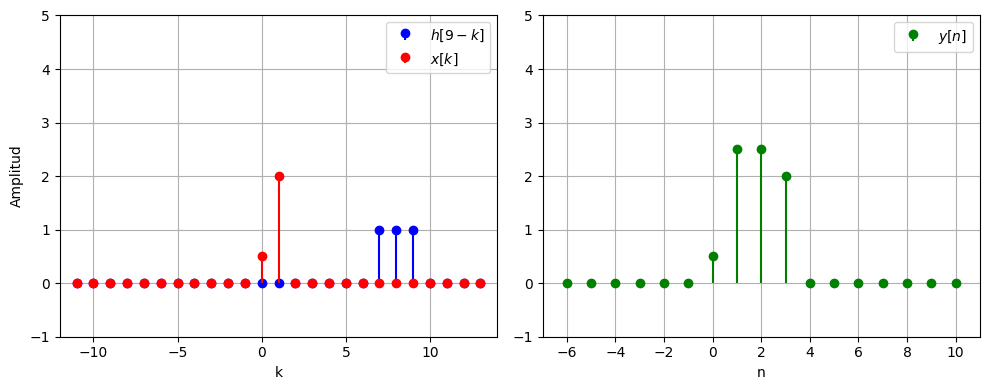

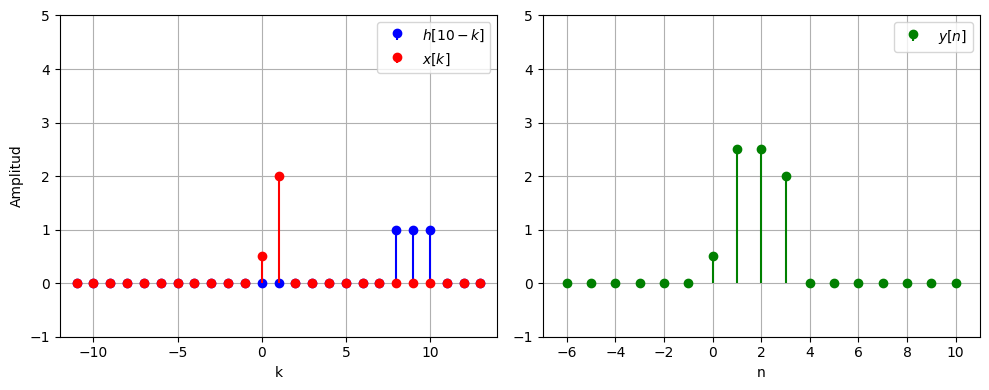

In [ ]:
#----------------Define las señales x[n] y h[n]--------------------------------

n_x_inicio=-2
n_x_fin=4

n_h_inicio=-2
n_h_fin=4

n_x=np.arange(n_x_inicio,n_x_fin+1)
n_h=np.arange(n_h_inicio,n_h_fin+1)

x=[0,0,0.5,2,0,0,0]
h=[0,0,1,1,1,0,0]

#--------Define las señal que sera reflejada. En este caso h[-k]----------------

# Si se decea que la señal reflejada sea x[-k] solo invertir el guardado
# de h y x. Es decir x es la señal que va en la funcion y h la señal que se
# guarda en S_est y k_est.

k_inv,S_inv=Trasform_DesEsc(n_h,h,-1,0,Grafic=False)                             # S_est es la señal que que se mantendra quieta, x[k].
S_est=x
k_est=n_x

#---------Espaciado entre inicio y fin Conv---------

# Para mayor visibilidad se asegura que una vez la funcion reflejada comienze a
# desplazarse por el eje k de convolucion, comienze a almenos dos unidades de la
# funcion en reposo y termine a dos unidades de la misma.

L_conv=len(x)+len(h)-1                                                           # La longitud del eje n de y[n] o de la convolucion.
ini_n_conv=np.min(n_h)+np.min(n_x)                                               # El punto n de inicio de la convolucion.
fi_n_conv=ini_n_conv+L_conv-1                                                    # El punto n de fin de la convolucion.

k_est_max=np.max(k_est)                                                          # El maximo k de la funcion estatica x[k]
k_l_max=np.min(k_inv)+fi_n_conv                                                  # El minimo k sobre el cual h[-k] estara inscrito al terminar de desplazarse

if (k_l_max-k_est_max<2):                                                        # Si la distancia entre el minimo de h[-k] y el maximo de x[k] es menor a dos
    unidad_h=2-(k_l_max-k_est_max)                                               # se estima la unidad que se debe ampliar a la derecha el eje n de y[n].
else:
    unidad_h=0

k_est_min=np.min(k_est)                                                          # El minimo k de la funcion estatica x[k]
k_l_min=np.max(k_inv)+ini_n_conv                                                 # El maximo k sobre el cual h[-k] estara inscrito al comenzar a desplazarse

if (k_est_min-k_l_min<2):                                                        # Si la distancia entre el maximo de h[-k] y el minimo de x[k] es menor a dos
    unidad_l=2-(k_est_min-k_l_min)                                               # se estima la unidad que se debe ampliar a la izquierda el eje n de y[n].
else:
    unidad_l=0


#--------------------Parametros de Señal Resultante----------------------------

y_conv=np.zeros (L_conv+unidad_h+unidad_l)                                       # Array de formacion para amplitudes de y[n]
n_conv=np.arange(ini_n_conv-unidad_l,fi_n_conv+unidad_h+1)                       # Eje de y[n].

#----------------------Eje k de desplazamiento---------------------------------

k_min=np.min(k_est)-len(S_inv)-unidad_l                                          # Igualmente se debe ampliar el eje k de ser necesario.
k_max=np.max(k_est)+len(S_inv)+unidad_h

k=np.arange(k_min,k_max+1)


#-----------------------Limites de amplitud-------------------------------------


conv_max=2*np.max(x)*np.max(h)                                                   # En el peor de los casos la maxima amplitud sera el doble
                                                                                 # del producto de las maximas amplitudes de x y h.

conv_min=2*np.min(x)*np.min(h)                                                   # En el peor de los casos la minima amplitud sera el doble
                                                                                 # del producto de las minimas amplitudes de x y h.

space=max(abs(conv_max),abs(conv_min))*0.25                                      # Espaciado entre limites de la convolucion y la figura.


#----------------Estima iterativamente los puntos de y[n]-----------------------


for i in range (len(n_conv)):
    k_invdes,S_invdes=Trasform_DesEsc(k_inv,S_inv,1,-n_conv[i],                  # Desplaza la señal reflejada por el valor de n
                                          Grafic=False)

    k,S_inv_k,S_est_k=Uni_Sig(k_invdes,S_invdes,k_est,S_est,k)                   # Crea señales graficables sobre eje k.

    y_conv[i]=np.sum(Operacion_Señales(k,S_inv_k,k,S_est_k,Operacion=3,          # Se realiza el producto de las señales desplaza y estatica
                                        Grafic=False)[1])                        # Y se suman los elementos del array resultante, tal es el punto y[n]

    #--------Define etiquetas y otros-----------------

    if (n_conv[i]>-1):
        lable=' '
    else:
        lable='-'

    #---------Configuración Inicial de Gráfica---------

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    if (i==0):
        fig.suptitle(r'$y[n]=x[n] * h[n]$',fontsize=14)

    ax[0].set_ylabel("Amplitud")
    ax[0].set_xlabel("k")
    ax[1].set_xlabel("n")

    ax[0].set_xlim(k_min-1,k_max+1)                                              # Límites en el eje x
    ax[1].set_xlim(ini_n_conv-unidad_l-1,fi_n_conv+unidad_h+1)

    for j in range(0,2):
        ax[j].set_ylim(conv_min-space,conv_max+space)                            # Límites en el eje y
        ax[j].grid(True)

    #---------Ajustar los límite de y[n] si es necesario-----

    n_y_min, n_y_max = ax[1].get_ylim()

    if max(y_conv) > n_y_max:
        ax[1].set_ylim(n_y_min,np.max(y_conv)+(0.25*np.max(y_conv)))

    if min(y_conv) < n_y_min:
        ax[1].set_ylim(min(y_conv) - (0.25*abs(min(y_conv))), n_y_max)

    #-------------Trazar las graficas-------------------------

    ax[0].stem(k,S_inv_k, basefmt=" ", label=f'$h[{lable}{abs(n_conv[i])}-k]$', linefmt='b-')
    ax[0].stem(k,S_est_k, basefmt=" ", label=f'$x[k]$', linefmt='r-')
    ax[0].legend()


    ax[1].stem(n_conv,y_conv, basefmt=" ", label=f'$y[n]$', linefmt='g-')
    ax[1].legend()


    plt.tight_layout()
    plt.show()


# Convolución Animada Implementación

In [ ]:
def Convolucion_Animate(n_x,x,n_h,h,key=False):

    #------------------Librerias--------------------------
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML

    #------------------Funciones internas-----------------

    def Uni_Sig(n1,x1,n2,x2,n_eje=None):                                         # Pemite poner dos señales discretas sobre el mismo eje n

        Min_n1=np.min(n1)
        Max_n1=np.max(n1)

        Min_n2=np.min(n2)
        Max_n2=np.max(n2)

        if n_eje is None:
            n_uni=np.arange(min(Min_n1,Min_n2),max(Max_n1,Max_n2)+1)             # Si no se espcifica el eje sobre el cual se quieren las señales,
                                                                                 # Se crea un eje comunEl vector comun donde se realizara la operacion.
        else:
            n_uni=n_eje

        x1_uni=np.zeros(len(n_uni),dtype=float)                                  # Se crean los vectores para contener la amplitud de las señales a operar.
        x2_uni=np.zeros(len(n_uni),dtype=float)

        x1_uni[np.isin(n_uni, n1)] = x1                                          # np.isin comprueba la presencia de elementos de n1 (o n2) en np.uni y genera un array
                                                                                 # booleano de la misma longitud de n.uni que indica si cada elemento n1 se encuentra en n.op.
                                                                                 # --->[True, False, False, True,.....]
                                                                                 # Esta instruccion asigna todos los elementos de x1 a x1_uni. En orden los valores de x1
                                                                                 # tendran las mismas pocisiones que el array booleano marcados como True. Las pocisiones False
                                                                                 # mantendran el cero inicial.
        x2_uni[np.isin(n_uni, n2)] = x2

        return n_uni,x1_uni,x2_uni

    def Trasform_DesEsc(n,x_n,Valor_esc,Valor_des,Inter_P=1,Grafic=True):        # Permite desplazar y escalar una señal discreta

        #---------Funcion encargada de la graficación---------------------------

        def Graf_DesEsc(n,x_n,n_des,n_esc,n_escI,x_nesc,Valor_des,Valor_esc,inv,Inter_P):

            def limites():                                                       # Se conservan los limites extremos.

                x_min=np.min(x_n)
                x_max=np.max(x_n)
                n_min=np.min(n)
                n_max=np.max(n)
                n_des_min=np.min(n_des)
                n_des_max=np.max(n_des)
                n_esc_min=np.min(n_esc)
                n_esc_max=np.max(n_esc)
                n_escI_min=np.min(n_escI)
                n_escI_max=np.max(n_escI)

                y_min=min(n_min,n_des_min,n_esc_min,n_escI_min)
                y_max=max(n_max,n_des_max,n_esc_max,n_escI_max)

                plt.axis([y_min-2,y_max+2,x_min-2,x_max+2])

            # ¿--------------------Etiquetas de leyendas------------------------

            if (Valor_des<0):
                sig_lable='-'
            else:
                sig_lable='+'

            if (np.abs(Valor_esc)>1):
                tipo_lable=' '
            else:
                if (Inter_P==1):
                        tipo_lable='(Interpolacion Cero)'
                elif (Inter_P==2):
                        tipo_lable='(Interpolacion Escalón)'
                elif (Inter_P==3):
                        tipo_lable='(Interpolacion Lineal)'

            #-------------------Dimenciones de la Graficas----------------------

            if (inv==False):
                plt.figure(figsize=(15,5))
            else:
                plt.figure(figsize=(15,12))

            if (inv==False):
                plt.subplot(1,3,1)
            else:
                plt.subplot(2,2,1)

            #--------------------Grafica señal Original-------------------------

            plt.stem(n,x_n,basefmt=" ", label=f'$x[n]$')
            plt.title("Señal Discreta")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limites()
            plt.grid(True)
            plt.legend()

            #---------------------Grafica señal Desplazada----------------------

            if (inv==False):
                plt.subplot(1,3,2)
            else:
                plt.subplot(2,2,2)

            plt.stem(n_des,x_n,linefmt='r', basefmt=" ",
                     label=f'$x[n{sig_lable}{np.abs(Valor_des)}]$')
            plt.title("Señal Discreta Desplazada")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limites()
            plt.grid(True)
            plt.legend()

            #-------------------Grafica señal Escalada--------------------------

            if (inv==False):
                plt.subplot(1,3,3)
            else:
                plt.subplot(2,2,3)

            plt.stem(n_esc,x_nesc,linefmt='g', basefmt=" ", label=
                     f'$x[{np.abs(Valor_esc)}n{sig_lable}{np.abs(Valor_des)}]$')
            plt.title(f'Señal Discreta Escalada {tipo_lable}')
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limites()
            plt.grid(True)
            plt.legend()

            #--------------------Grafica señal Reflejada------------------------

            if (inv==True):

                plt.subplot(2,2,4)
                plt.stem(n_escI,x_nesc,linefmt='g', basefmt=" ", label=
                         f'$x[{Valor_esc}n{sig_lable}{np.abs(Valor_des)}]$')
                plt.title("Señal Discreta Reflejada")
                plt.xlabel("Tiempo (s)")
                plt.ylabel("Amplitud")
                limites()
                plt.grid(True)
                plt.legend()

            plt.show()

        #------------Funcion encargada de la interpolacion Lineal---------------

        def interpolacion_lineal(n1, x_n1, n2, x_n2, n):

            sol = x_n1 + (x_n2 - x_n1) * (n - n1) / (n2 - n1)
            return sol

        #---------------------------Desplazamiento------------------------------

        n_des=n-(Valor_des)                                                      # Con restar el valor del desplazamiento n0 basta para obtener el vecto n desplazado
                                                                                 # Si n0>0 se presenta un adelanto. Si n0<0 se presenta un atraso.

        #---------------------------Escalado------------------------------------

        if (np.abs(Valor_esc)>1):

            n_esc = np.array([x // (np.abs(Valor_esc)) for x in n_des            # Se crea el vector de n escalado. Se aplica la division entera del valor abs de a
                              if x % np.abs(Valor_esc) == 0])                    # factor de escalado para cada dato de el vector de n desplazado, pero solo se guardan
                                                                                 # los resultados enteros.


            x_nesc = np.array([x_n[np.digitize(np.abs(Valor_esc)*i, n_des) - 1]  # Se arma el vector de amplitudes diezmado. Primero se toma cada valor de n escalado y se regresa
                               for i in n_esc])                                  # a su valor original. Luego se busca el indice de ese valor en el vector n sin escalar
                                                                                 # Para esto se usa la funcion digitize (). Como las dimeciones de n y X[n] son las misma,
                                                                                 # basta con este indice para extraer el valor de x[n] correspondiente.

        else:

            Z=int(1/np.abs(Valor_esc))                                           # El factor que se multiplica cada valor de tiempo es 1/M.
            n_esc=np.arange(np.min(n_des)*Z,np.max(n_des)*Z+1)                   # Se escala el vector n desplazado.
            L_ndes=len(n_des)                                                    # Longitud del vector n desplazado.
            L_nesc=len(n_esc)                                                    # Longitud del vector n escalado.

            x_nesc = np.arange(1,L_nesc+1,dtype=float)                           # Se crea un vector para las amplitudes de la señal escalada.

            for k in range(L_nesc):                                              # Se analiza los indeces del vector n escalado.

                if (k / Z).is_integer():

                    r=int(k*np.abs(Valor_esc))
                    x_nesc[k]=x_n[r]

                else:

                    if (Inter_P==1):                                             # Define el metodo de interpolacion  (Inter_P=1 [Por defecto]-->Interpolacion con 0)
                        x_nesc[k]=0                                              #                                    (Inter_P=2--> Interpolacion Escalon)
                    elif (Inter_P==2):                                           #                                    (Inter_P=3--> Interpolacion Lineal)
                        x_nesc[k]=x_nesc[k-1]
                    elif (Inter_P==3):
                        x_nesc[k]=interpolacion_lineal(                          # Interpolación
                            n_esc[r*Z], x_n[r], n_esc[(r+1)*Z], x_n[r+1],
                            n_esc[k])

        #--------------------Invercion------------------------------------------

        if (Valor_esc<0):                                                        # Si el señal debe reflejarse se invierte la direccion del vector n escalado.
            n_escI=-n_esc
            Key_inv=True

            n_esc_retur=np.flip(n_escI)                                          # np.flip invierte el orden de los datos de n_esc y x_nesc.
            x_nesc_retur=np.flip(x_nesc)

        else:
            n_escI=n_esc
            Key_inv=False

            n_esc_retur=n_esc
            x_nesc_retur=x_nesc

        #-----------------------------------Salida------------------------------

        if (Grafic==True):

            Graf_DesEsc(n,x_n,n_des,n_esc,n_escI,x_nesc,Valor_des,               # En el caso de que se desse graficar el parametro Grafic=True [Por defecto]
                        Valor_esc,Key_inv,Inter_P)                               # y la funcion graficara la trasformacion.

        else:

            return n_esc_retur, x_nesc_retur                                     # En el caso de que desee obtener los valores de la señal trasformada el parametro Grafic=False y la
                                                                                 # Funcion entregara una tubla con los valores de n escala y x[n] escala.

    def Operacion_Señales(n1,x1,n2,x2,Operacion=1,Grafic=True,Full=False):       # Permite Sumar, Restar o Multiplicar señales discretas

        #---------Funcion para graficar tres señales operadas-------------------

        def Graf_3Sig_Op(n1,x1,n2,x2,n3,x3,Operacion=1):

            def limitesSig_Op():

                n1_min=np.min(n1)
                n1_max=np.max(n1)
                n2_min=np.min(n2)
                n2_max=np.max(n2)
                n3_min=np.min(n3)
                n3_max=np.max(n3)
                x1_min=np.min(x1)
                x1_max=np.max(x1)
                x2_min=np.min(x2)
                x2_max=np.max(x2)
                x3_min=np.min(x3)
                x3_max=np.max(x3)

                y_min=min(n1_min,n2_min,n3_min)
                y_max=max(n1_max,n2_max,n3_max)
                x_min=min(x1_min,x2_min,x3_min)
                x_max=max(x1_max,x2_max,x3_max)

                plt.axis([y_min-2,y_max+2,x_min-2,x_max+2])

            plt.figure(figsize=(15,12))

            plt.subplot(2,2,1)
            plt.stem(n1,x1,basefmt=" ", label=f'$x_{1}[n]$')
            plt.title(f"Señal Discreta $x_{1}[n]$")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limitesSig_Op()
            plt.grid(True)
            plt.legend()

            plt.subplot(2,2,2)
            plt.stem(n2,x2,linefmt='r',basefmt=" ", label=f'$x_{2}[n]$')
            plt.title(f"Señal Discreta $x_{2}[n]$")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limitesSig_Op()
            plt.grid(True)
            plt.legend()


            plt.subplot(2,2,3)
            plt.stem(n1,x1,linefmt="b", basefmt=" ", label=f'$x_{1}[n]$')

            if (Operacion==1):
                plt.stem(n2,x2,linefmt="r",basefmt=" ", label=f'$x_{2}[n]$')
                plt.title(f"Señal Discreta $x_{1}[n]+x_{2}[n]$")
            elif(Operacion==2):
                plt.stem(n2,-x2,linefmt="r",basefmt=" ", label=f'$-x_{2}[n]$')
                plt.title(f"Señal Discreta $x_{1}[n]-x_{2}[n]$")
            elif(Operacion==3):
                plt.stem(n2,x2,linefmt="r",basefmt=" ", label=f'$x_{2}[n]$')
                plt.title(f"Señal Discreta $x_{1}[n]x_{2}[n]$")

            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limitesSig_Op()
            plt.grid(True)
            plt.legend()

            plt.subplot(2,2,4)
            plt.stem(n3,x3,linefmt='g',basefmt=" ", label=f'$x_{3}[n]$')
            plt.title(f"Señal Discreta $x_{3}[n]$")
            plt.xlabel("Tiempo (s)")
            plt.ylabel("Amplitud")
            limitesSig_Op()
            plt.grid(True)
            plt.legend()
            plt.show()

        #-------------------------Preparan las funciones------------------------

        n_op,x1_op,x2_op=Uni_Sig(n1,x1,n2,x2)

        #-------------------------------Operar----------------------------------

        if (Operacion==1):                                                       # Si Operacion = 1 se hara una suma.
            x_op=x1_op+x2_op
        elif (Operacion==2):                                                     # Si Operacion = 2 se hara una resta.
            x_op=x1_op-x2_op
        elif (Operacion==3):                                                     # Si Operacion = 3 se hara un producto.
            x_op=x1_op*x2_op
        else:
            return print("Error: tipo de operacion")


        #-----------------------------Salida------------------------------------

        if (Grafic==True):
            Graf_3Sig_Op(n1,x1,n2,x2,n_op,x_op,Operacion)                        # En el caso de que se desse graficar el parametro Grafic=True [Por defecto]
        else:
            if (Full==True):
                return n_op,x_op,x1_op,x2_op                                     # El parametro Full regresa cada array que hace parte de la operacion.
            else:
                return n_op,x_op                                                 # Por defecto solo de regresa la señal (ampitud y eje) resultante.

    #---------------Funciones a Convolucion--------------

    if (key==False):                                                             # Si key=False la señal en movimiento S_inv=h[-n] y la quieta S_est=x[n]
        k_inv,S_inv=Trasform_DesEsc(n_h,h,-1,0,Grafic=False)
        S_est=x
        k_est=n_x
    else:
        k_inv,S_inv=Trasform_DesEsc(n_x,x,-1,0,Grafic=False)                     # Si key=True el papel de la señales se invierte.
        S_est=h
        k_est=n_h

    #---------Espaciado entre inicio y fin Conv---------

    L_conv=len(x)+len(h)-1                                                       # La longitud del eje n de y[n] o de la convolucion.
    ini_n_conv=np.min(n_h)+np.min(n_x)                                           # El punto n de inicio de la convolucion.
    fi_n_conv=ini_n_conv+L_conv-1                                                # El punto n de fin de la convolucion.

    k_est_max=np.max(k_est)
    k_l_max=np.min(k_inv)+fi_n_conv

    k_est_min=np.min(k_est)
    k_l_min=np.max(k_inv)+ini_n_conv

    if (k_l_max-k_est_max<2):
        unidad_h=2-(k_l_max-k_est_max)
    else:
        unidad_h=0

    if (k_est_min-k_l_min<2):
        unidad_l=2-(k_est_min-k_l_min)
    else:
        unidad_l=0


    #---------Parametros de Señal Resultante------------

    y_conv=np.zeros (L_conv+unidad_h+unidad_l)                                   # Array de formacion para amplitudes de y[n]
    n_conv=np.arange(ini_n_conv-unidad_l,fi_n_conv+unidad_h+1)                   # Eje de y[n]

    #----------Eje k de desplazamiento--------------------

    k_min=np.min(k_est)-len(S_inv)-unidad_l
    k_max=np.max(k_est)+len(S_inv)+unidad_h

    k=np.arange(k_min,k_max+1)


    #----------Limites de amplitud-----------------------


    conv_max=2*np.max(x)*np.max(h)                                               # En el peor de los casos la maxima amplitud sera el doble
                                                                                 # del producto de las maximas amplitudes de x y h.

    conv_min=2*np.min(x)*np.min(h)                                               # En el peor de los casos la minima amplitud sera el doble
                                                                                 # del producto de las minimas amplitudes de x y h.

    space=max(abs(conv_max),abs(conv_min))*0.25                                  # espaciado entre limites de la convolucion y la figura.

    #---------Configuración Incial de la Gráfica---------

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle(r'$y[n]=x[n] * h[n]$',fontsize=14)

    ax[0].set_ylabel("Amplitud")

    ax[0].set_xlim(k_min-1,k_max+1)
    ax[0].set_xlabel("k")
    ax[1].set_xlim(ini_n_conv-unidad_l-1,fi_n_conv+unidad_h+1)
    ax[1].set_xlabel("n")

    for i in range(0,2):
        ax[i].set_ylim(conv_min-space,conv_max+space)                            # Límites en el eje y
        ax[i].grid(True)


    #---------------Inicializar Gráficos Stem-------

    markerline, stemlines, baseline = ax[0].stem(k_inv, S_inv, basefmt=" "       # Extraer tallos, puntos y linea de base de cada grafica.
                                                ,linefmt='r-')
    markerline1, stemlines1, baseline1 = ax[0].stem(k_est, S_est, basefmt=" "
                                                ,linefmt='b-')
    markerline2, stemlines2, baseline2 = ax[1].stem(n_conv, y_conv,
                                                basefmt=" ",linefmt='g-')

    #----Función de inicialización (limpiar pantalla)----

    def init():

        markerline.set_data([], [])
        stemlines.set_segments([])

        markerline1.set_data([], [])
        stemlines1.set_segments([])

        markerline2.set_data([], [])
        stemlines2.set_segments([])

        return markerline, stemlines, markerline1, stemlines1, markerline2, stemlines2

    #-----------------Actualiza frame-----------------

    def update(i, n_conv, y_conv, k, key):

        k_invdes,S_invdes=Trasform_DesEsc(k_inv,S_inv,1,-n_conv[i],              # Desplaza la señal invertida.
                                          Grafic=False)

        k,S_inv_k,S_est_k=Uni_Sig(k_invdes,S_invdes,k_est,S_est,k)               # Crea señales graficables sobre eje k.

        y_conv[i]=np.sum(Operacion_Señales(k,S_inv_k,k,S_est_k,Operacion=3,
                                        Grafic=False)[1])                        # Realiza el producto y actualiza y[n]

        # Define etiquetas y otros

        if (n_conv[i]>-1):
            lable=' '
        else:
            lable='-'

        markerline.set_data(k, S_est_k)                                          # Se actualizan las pocisiones (n,amplitud) de los puntos del Stem
        markerline1.set_data(k, S_inv_k)
        markerline2.set_data(n_conv, y_conv)

        stemlines.set_segments([[[ai, 0], [ai, bi]] for                          # Actualizamos las líneas de los stems (segmentos)
                                ai, bi in zip(k, S_est_k)])
        stemlines1.set_segments([[[ni, 0], [ni, pi]] for
                                 ni, pi in zip(k, S_inv_k)])
        stemlines2.set_segments([[[mi, 0], [mi, qi]] for
                                 mi, qi in zip(n_conv, y_conv)])

        # Actualiza las leyendas

        if (key==False):
            ax[0].legend([markerline1,markerline],[f'$h[{lable}{abs(n_conv[i])}-k]$',f'$x[k]$'], loc='upper right')
        else:
            ax[0].legend([markerline1,markerline],[f'$x[{lable}{abs(n_conv[i])}-k]$',f'$h[k]$'], loc='upper right')

        ax[1].legend([markerline2],[f'$y[n]$'], loc='upper right')

        # Ajustar los límite de y[n] si es necesario

        n_y_min, n_y_max = ax[1].get_ylim()

        if max(y_conv) > n_y_max:
            ax[1].set_ylim(n_y_min,np.max(y_conv)+(0.25*np.max(y_conv)))

        if min(y_conv) < n_y_min:
            ax[1].set_ylim(min(y_conv) - (0.25*abs(min(y_conv))), n_y_max)

        return markerline, stemlines, markerline1, stemlines1

    #--------------------Crear la animación--------------
    ani = FuncAnimation(fig, update, frames=np.arange(len(n_conv)),
                        init_func=init, fargs=(n_conv, y_conv, k, key),blit=False, interval=1000)


    #-----------------Cerrar la figura incial Stem--------
    plt.close(fig)

    #--------Mostrar la animación-------------
    return HTML(ani.to_jshtml())


## Pruebas

### A)
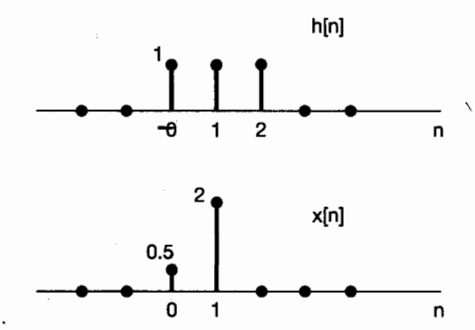

In [ ]:
import numpy as np

n_x_inicio=-2
n_x_fin=4

n_h_inicio=-2
n_h_fin=4

n=np.arange(n_x_inicio,n_x_fin+1)                                                # En este caso x[n] y h[n] comparten el mismo eje n.

n_x=n
n_h=n

x=[0,0,0.5,2,0,0,0]
h=[0,0,1,1,1,0,0]

Convolucion_Animate(n_x,x,n_h,h,key=False)


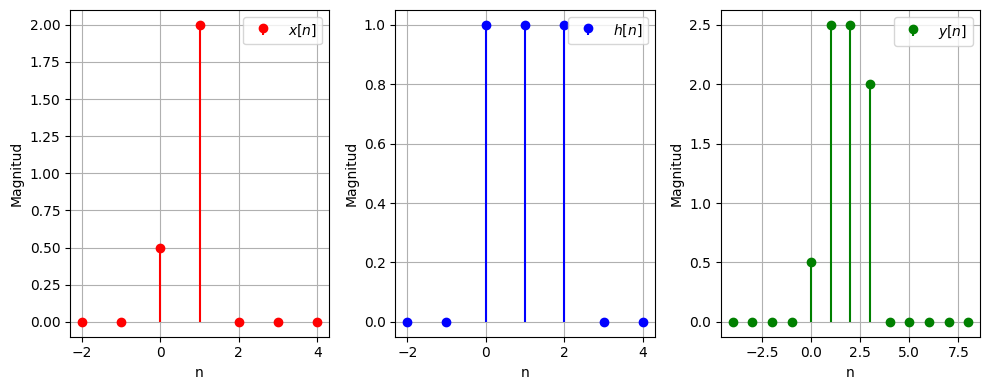

In [ ]:
import matplotlib.pyplot as plt

y = np.convolve(x, h, mode='full')
N=np.arange((min(n_x)+min(n_h)),(min(n_h)+min(n_x))+len(h)+len(x)-1)

plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
plt.stem(n_x,x, basefmt=" ", label=f'$x[n]$', linefmt='r-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 2)
plt.stem(n_h,h, basefmt=" ", label=f'$h[n]$', linefmt='b-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 3)
plt.stem(N,y, basefmt=" ", label=f'$y[n]$', linefmt='g-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

### B)

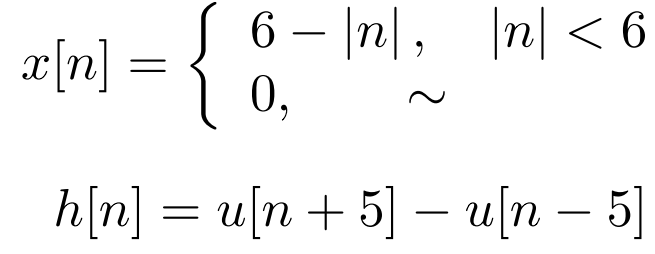

In [ ]:
import numpy as np

n_x_inicio=-5
n_x_fin=5

n_h_inicio=-5
n_h_fin=5

n=np.arange(n_x_inicio,n_x_fin+1)                                                # En este caso x[n] y h[n] comparten el mismo eje n.

n_x=n
n_h=n

x=np.zeros(len(n))

for i in range(len(n)):
    x[i]=6-abs(n[i])

h=np.ones(len(n))

Convolucion_Animate(n_x,x,n_h,h,key=False)

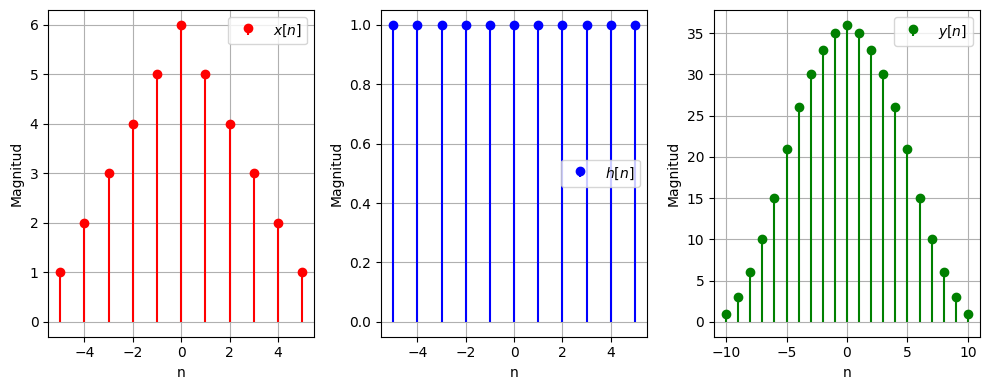

In [ ]:
import matplotlib.pyplot as plt

y = np.convolve(x, h, mode='full')
N=np.arange((min(n_x)+min(n_h)),(min(n_h)+min(n_x))+len(h)+len(x)-1)

plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
plt.stem(n_x,x, basefmt=" ", label=f'$x[n]$', linefmt='r-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 2)
plt.stem(n_h,h, basefmt=" ", label=f'$h[n]$', linefmt='b-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 3)
plt.stem(N,y, basefmt=" ", label=f'$y[n]$', linefmt='g-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

### C)

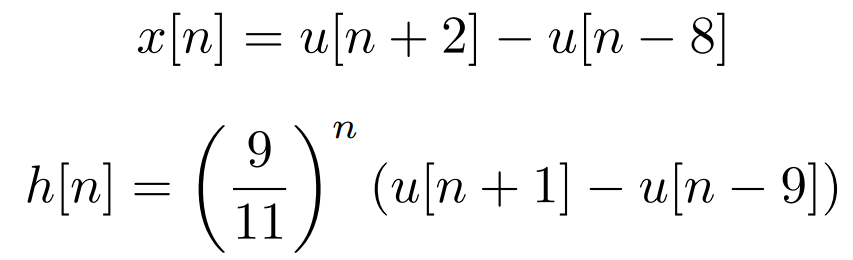


In [ ]:
import numpy as np

n_x_inicio=-2
n_x_fin=8

n_h_inicio=-1
n_h_fin=9

n_x=np.arange(n_x_inicio,n_x_fin+1)                                                # En este caso x[n] y h[n] comparten el mismo eje n.
n_h=np.arange(n_h_inicio,n_h_fin+1)

x=np.ones(len(n_x))

h=np.zeros(len(n_h))

for i in range(len(n_h)):
    h[i]=pow((9/11),(n_h[i]))

Convolucion_Animate(n_x,x,n_h,h,key=False)

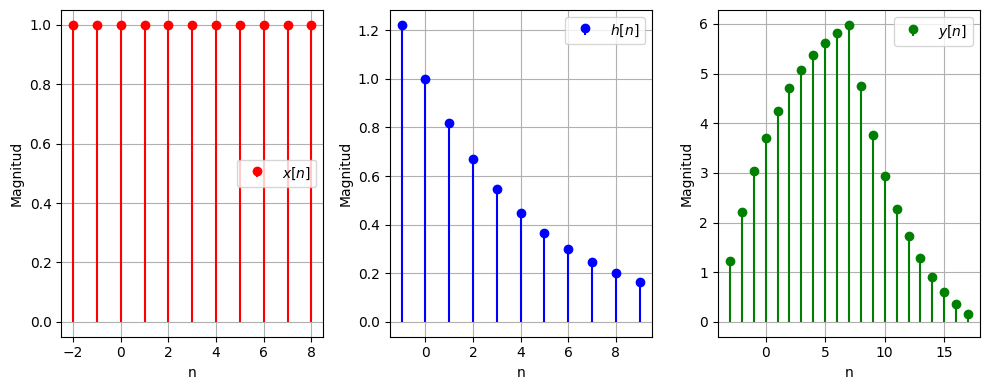

In [ ]:
import matplotlib.pyplot as plt

y = np.convolve(x, h, mode='full')
N=np.arange((min(n_x)+min(n_h)),(min(n_x)+min(n_h))+len(h)+len(x)-1)

plt.figure(figsize=(10,4))

plt.subplot(1, 3, 1)
plt.stem(n_x,x, basefmt=" ", label=f'$x[n]$', linefmt='r-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 2)
plt.stem(n_h,h, basefmt=" ", label=f'$h[n]$', linefmt='b-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 3)
plt.stem(N,y, basefmt=" ", label=f'$y[n]$', linefmt='g-')
plt.xlabel("n")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()